<a href="https://colab.research.google.com/github/Darshini-A/Deep-Learning/blob/main/GradientDescent%20%2C%20BackPropogation%201%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
# Demonstrate Gradient descent and the back propagation algorithm

In [104]:
# Solving using basic function

In [105]:
import numpy as np
import matplotlib.pyplot as plt

In [106]:
np.random.seed(42)
X = np.random.rand(2, 100)
Y = np.random.randint(0, 2, (1, 100))

In [107]:
input_size = X.shape[0]
hidden_size = 4
output_size = 1
learning_rate = 0.01
epochs = 1000

In [108]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [109]:
def initialize_parameters(input_size, hidden_size, output_size):
    np.random.seed(42)
    W_hidden = np.random.rand(hidden_size, input_size)
    b_hidden = np.zeros((hidden_size, 1))
    W_output = np.random.rand(output_size, hidden_size)
    b_output = np.zeros((output_size, 1))
    return W_hidden, b_hidden, W_output, b_output

In [110]:
def forward_propagation(X, W_hidden, b_hidden, W_output, b_output):
    Z_hidden = np.dot(W_hidden, X) + b_hidden
    A_hidden = sigmoid(Z_hidden)
    Z_output = np.dot(W_output, A_hidden) + b_output
    A_output = sigmoid(Z_output)
    return Z_hidden, A_hidden, Z_output, A_output

In [111]:
def compute_loss(A_output, Y):
    m = Y.shape[1]
    loss = - (1 / m) * np.sum(Y * np.log(A_output) + (1 - Y) * np.log(1 - A_output))
    return loss

In [112]:
def backward_propagation(X, Y, Z_hidden, A_hidden, Z_output, A_output, W_output):
    m = Y.shape[1]

    dZ_output = A_output - Y
    dW_output = (1 / m) * np.dot(dZ_output, A_hidden.T)
    db_output = (1 / m) * np.sum(dZ_output, axis=1, keepdims=True)

    dZ_hidden = np.dot(W_output.T, dZ_output) * sigmoid_derivative(A_hidden)
    dW_hidden = (1 / m) * np.dot(dZ_hidden, X.T)
    db_hidden = (1 / m) * np.sum(dZ_hidden, axis=1, keepdims=True)

    return dW_hidden, db_hidden, dW_output, db_output

In [113]:
def update_parameters(W_hidden, b_hidden, W_output, b_output, dW_hidden, db_hidden, dW_output, db_output, learning_rate):
    W_hidden -= learning_rate * dW_hidden
    b_hidden -= learning_rate * db_hidden
    W_output -= learning_rate * dW_output
    b_output -= learning_rate * db_output
    return W_hidden, b_hidden, W_output, b_output

In [114]:
def train_neural_network(X, Y, hidden_size, output_size, learning_rate, epochs):
    input_size = X.shape[0]
    W_hidden, b_hidden, W_output, b_output = initialize_parameters(input_size, hidden_size, output_size)

    for epoch in range(epochs):
        # Forward propagation
        Z_hidden, A_hidden, Z_output, A_output = forward_propagation(X, W_hidden, b_hidden, W_output, b_output)

        # Compute loss
        loss = compute_loss(A_output, Y)

        # Backward propagation
        dW_hidden, db_hidden, dW_output, db_output = backward_propagation(X, Y, Z_hidden, A_hidden, Z_output, A_output, W_output)

        # Update parameters
        W_hidden, b_hidden, W_output, b_output = update_parameters(W_hidden, b_hidden, W_output, b_output, dW_hidden, db_hidden, dW_output, db_output, learning_rate)

        # Print the loss every 100 epochs
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss}")

    return W_hidden, b_hidden, W_output, b_output

In [115]:
# Train the neural network
trained_parameters = train_neural_network(X, Y, hidden_size, output_size, learning_rate, epochs)

# Test the trained network with new data
def predict(X, W_hidden, b_hidden, W_output, b_output):
    _, _, _, A_output = forward_propagation(X, W_hidden, b_hidden, W_output, b_output)
    predictions = (A_output > 0.5).astype(int)
    return predictions

Epoch 0, Loss: 0.8736023253758296
Epoch 100, Loss: 0.7532757451668407
Epoch 200, Loss: 0.7112029721695292
Epoch 300, Loss: 0.6980654752546296
Epoch 400, Loss: 0.6941216965070645
Epoch 500, Loss: 0.6929334771355903
Epoch 600, Loss: 0.6925538592701413
Epoch 700, Loss: 0.692409845257748
Epoch 800, Loss: 0.6923345111683213
Epoch 900, Loss: 0.6922794249507496


In [116]:
# Generate new test data
X_test = np.random.rand(2, 10)
predictions = predict(X_test, *trained_parameters)

print("Predictions :")
print(predictions)

Predictions :
[[1 1 1 1 1 1 1 1 1 1]]


In [117]:
# Solving using tensorflow framework

In [118]:
import tensorflow as tf
import numpy as np

In [119]:
np.random.seed(42)
X = np.random.rand(100, 2)
Y = np.random.randint(0, 2, (100, 1))

In [120]:
input_size = 2
hidden_size = 4
output_size = 1
learning_rate = 0.01
epochs = 1000

In [121]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_size, activation='sigmoid', input_shape=(input_size,), name='hidden_layer'),
    tf.keras.layers.Dense(output_size, activation='sigmoid', name='output_layer')
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer (Dense)        (None, 4)                 12        
                                                                 
 output_layer (Dense)        (None, 1)                 5         
                                                                 
Total params: 17 (68.00 Byte)
Trainable params: 17 (68.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [126]:
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = ['accuracy'])

# Train the model
history = model.fit(X, Y, epochs=epochs, verbose=0)

In [127]:
loss, accuracy = model.evaluate(X, Y)
print(f'\nFinal Loss : {loss}, \nFinal Accuracy : {accuracy}')

4/4 [==============================] - 0s 4ms/step - loss: 0.6870 - accuracy: 0.5500

Final Loss : 0.6870406270027161, 
Final Accuracy : 0.550000011920929


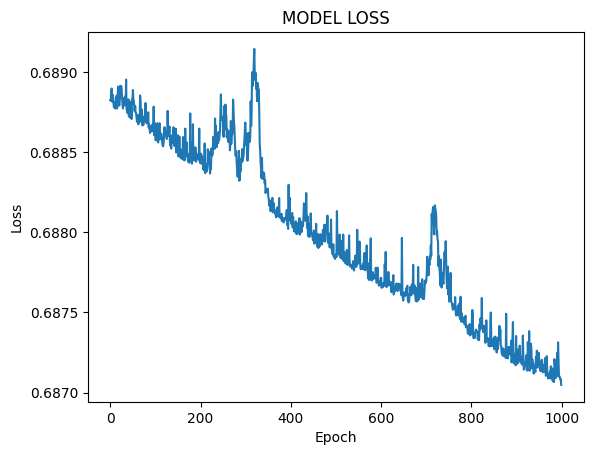

In [128]:
plt.plot(history.history['loss'])
plt.title('MODEL LOSS')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [129]:
# Test the trained model with new data
X_test = np.random.rand(10, 2)
predictions = model.predict(X_test)
binary_predictions = (predictions > 0.5).astype(int)

print("\nPredictions :")
print(binary_predictions)

1/1 [==============================] - 0s 85ms/step

Predictions :
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
